# Day 4 作業

## [作業目標]
* 透過以下的插值演算法來放大與縮小 Lena 圖(放大與縮小4倍)，並比較各個演算法的時間差異：

    1. Inter nearest interpolation
    2. Inter linear interpolation
    3. Inter area interpolation
    4. Inter cubic interpolation
    5. Inter lanczos4 interpolation

## [作業重點]
* 熟悉 OpenCV 的 resize 函數
* 學會使用 time 模組來計算程式運行時間
* 觀察圖片的變化

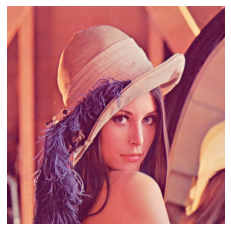

In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

# cv2 預設 color space 是 BGR，但 matplotlib，
# 顯示是以 RGB 來顯示，故需要做順序的調整

img = cv2.imread('./D00_lena.png', cv2.IMREAD_COLOR)[...,[2,1,0]]
plt.imshow(img)
plt.axis('off')
plt.show()

# 進行放大的比較

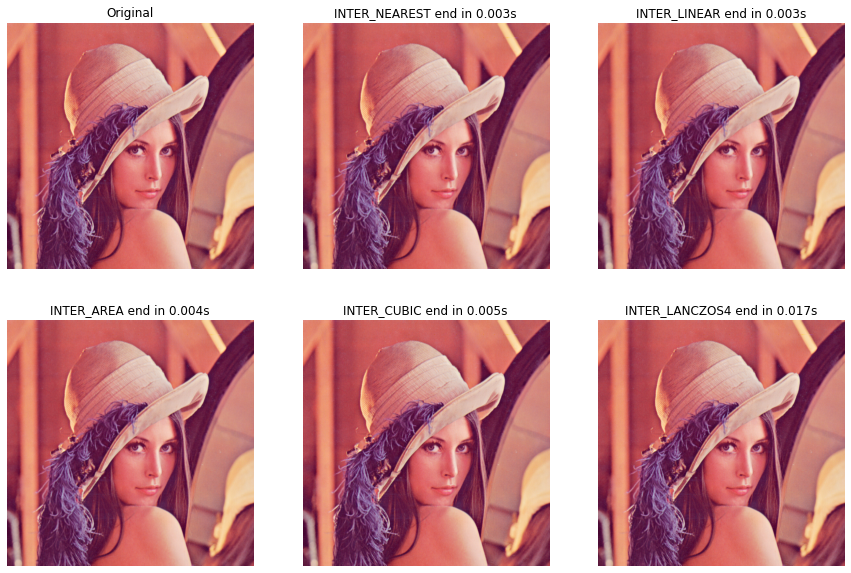

In [4]:
# 方便顯示與進行縮放
interpolation = {'Original': 0,
                 'INTER_NEAREST': cv2.INTER_NEAREST,
                 'INTER_LINEAR': cv2.INTER_LINEAR,
                 'INTER_AREA': cv2.INTER_AREA,
                 'INTER_CUBIC': cv2.INTER_CUBIC,
                 'INTER_LANCZOS4': cv2.INTER_LANCZOS4}

# 定義欲放大的倍率
fx, fy = 4, 4

# 定義作圖版面大小
plt.figure(figsize = (15, 10))

# 開始進行5種插值法的放大比較
for i,x in enumerate(interpolation.items()):
    if i:
        start = time.time() # 按下碼表計時
        img_resize = cv2.resize(img, None, fx = fx, fy = fy, interpolation = x[1])
        end = time.time() # 結束計時
    # 開始做圖
    plt.subplot(2, 3, i+1, title = f'{x[0]} end in {(end - start):.3f}s' if i else x[0])
    plt.imshow(img_resize if i else img)
    plt.axis('off')
plt.show()

# 進行縮小的比較

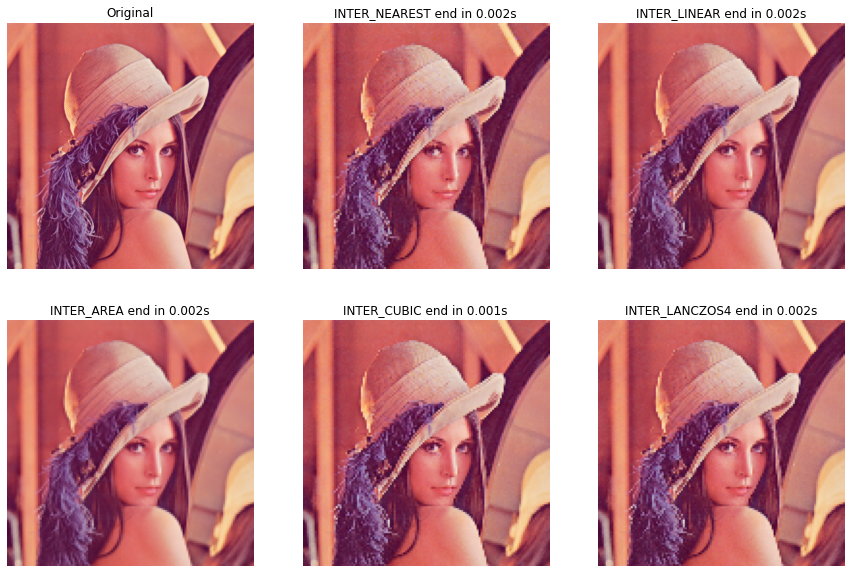

In [5]:
# 方便顯示與進行縮放
interpolation = {'Original': 0,
                 'INTER_NEAREST': cv2.INTER_NEAREST,
                 'INTER_LINEAR': cv2.INTER_LINEAR,
                 'INTER_AREA': cv2.INTER_AREA,
                 'INTER_CUBIC': cv2.INTER_CUBIC,
                 'INTER_LANCZOS4': cv2.INTER_LANCZOS4}

# 定義欲縮小的倍率
fx, fy = .25, .25

# 定義作圖版面大小
plt.figure(figsize = (15, 10))

# 開始進行5種插值法的縮小比較
for i,x in enumerate(interpolation.items()):
    if i:
        start = time.time() # 按下碼表計時
        img_resize = cv2.resize(img, None, fx = fx, fy = fy, interpolation = x[1])
        end = time.time() # 結束計時
    # 開始做圖
    plt.subplot(2, 3, i+1,  title = f'{x[0]} end in {(end - start):.3f}s' if i else x[0])
    plt.imshow(img_resize if i else img)
    plt.axis('off')
plt.show()